In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta = np.linspace(0,10, 100) 

# Define the values for omega_not
omega_not_values = [0.2, 0.3, 0.5,0.9, 2,5]

th = 13.8

In [3]:
def scale_factor(theta, omega_not):
    a = (omega_not/(2*(1 - omega_not)))*(np.cosh(theta)-1 )
    return a 


In [4]:
def time(theta, omega_not):
    t = ((omega_not/(2*(1 - omega_not)**1.5))*(np.sinh(theta) - theta)) * th
    return t


/home/vivek/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


ValueError: 'Log' is not a valid value for scale; supported values are 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

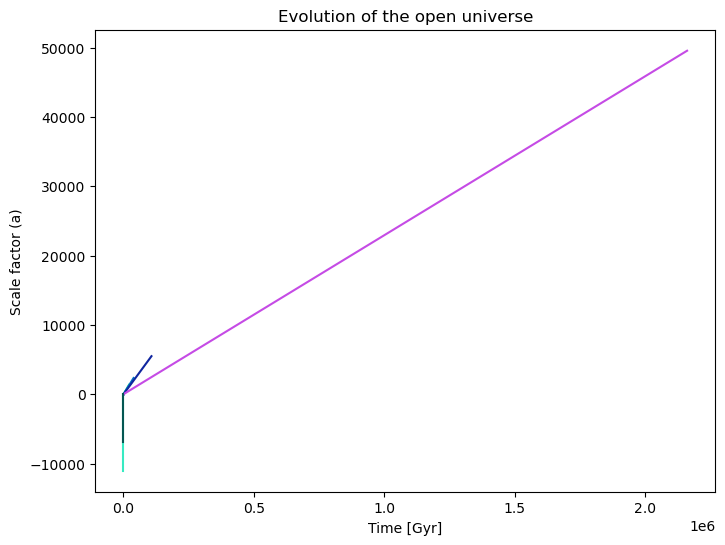

In [5]:
# Create a 2D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for omega_not in omega_not_values :
    ax.plot( time(theta, omega_not),scale_factor(theta, omega_not), label=f"Omega_not = {omega_not}", color=np.random.rand(3))
ax.set_ylabel('Scale factor (a)')
ax.set_xlabel('Time [Gyr]')
ax.set_title('Evolution of the open universe')
ax.set_xscale("Log")
# ax.set_yscale("Log")
ax.set_ylim([0,100])
ax.legend() 
plt.show()

In [6]:
# for closed universedef scale_factor(theta, omega_not)
   

In [7]:
def scale_factor1(theta, omega_not):
    a = (omega_not/(2*(omega_not - 1 )))*(1 - np.cos(theta))
    return a 

In [8]:
def time1(theta, omega_not):
    t = ((omega_not/(2*( omega_not - 1 )**1.5))*(theta - np.sin(theta) )) * th
    return t
print(omega_not_values)

[0.2, 0.3, 0.5, 0.9, 2, 5]


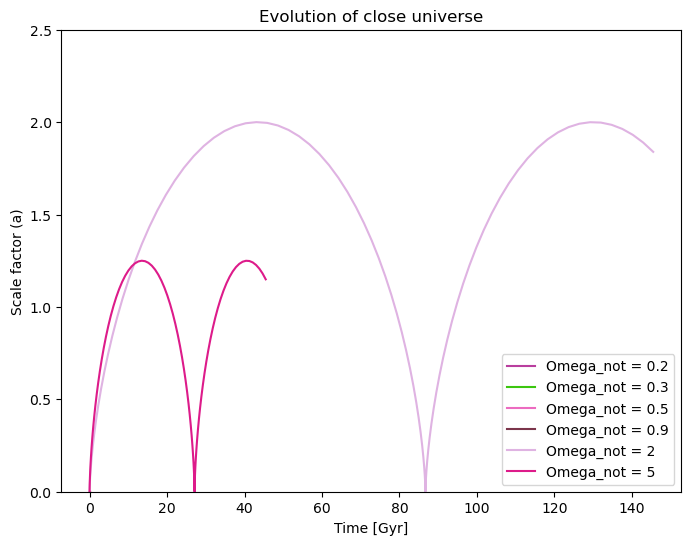

In [9]:
# Create a 2D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for omega_not in omega_not_values :
    ax.plot( time1(theta, omega_not),scale_factor1(theta, omega_not) , label=f"Omega_not = {omega_not}", color=np.random.rand(3))
ax.set_ylabel('Scale factor (a)')
ax.set_xlabel('Time [Gyr]')
ax.set_title('Evolution of close universe')
ax.set_ylim([0,2.5])
ax.legend()
plt.show()

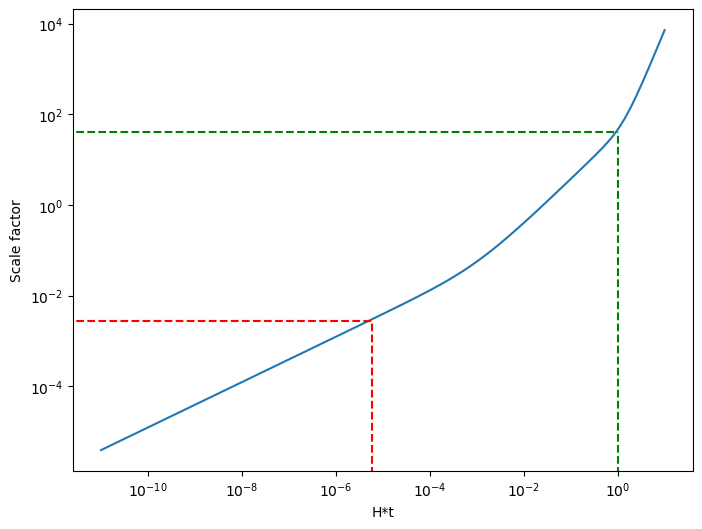

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#Define constants

H0 = 67.7            #km/s/Mpc, Hubble constant
Om_r = 8.4e-5        # Radiation density parameter
Om_m = 0.3           # Matter density parameter
Om_L = 0.7           # Dark energy density parameter
Om_k = 1 - Om_r - Om_m - Om_L
G = 6.6743e-11       # Gravitational constant
c = 299792458        # Speed of light

# Define the function for the Hubble parameter

def Hubble_parameter(a):
    return H0*np.sqrt(Om_r*a**-3+ Om_m*a**-2 + Om_k*a**-1 + Om_L*a)

# Define the function for the scale factor as a function of H*t

def scale_factor(Ht):
    integrand = lambda x: (x * Hubble_parameter(x))
    return quad(integrand, 0, Ht)[0]

# Generate the plot

ax, fig = plt.subplots(figsize = (8,6))
Ht_values = np.logspace(-11, 1, 100)
a_values = [scale_factor(Ht) for Ht in Ht_values]
plt.loglog(Ht_values, a_values)

# Draw vertical and horizontal line lines 

plt.vlines(x=[10**-5.22], ymin=0, ymax=10**-2.55, color='red', linestyle='--')
plt.hlines(y=[10**-2.55], xmin=0, xmax=10**-5.22, color='red', linestyle='--')
plt.vlines(x=[10**0], ymin=0, ymax=40, color='g', linestyle='--')
plt.hlines(y=[40], xmin=0, xmax=1, color='g', linestyle='--')


plt.xlabel('H*t')
plt.ylabel('Scale factor')
plt.savefig("fig1.png")
plt.show()


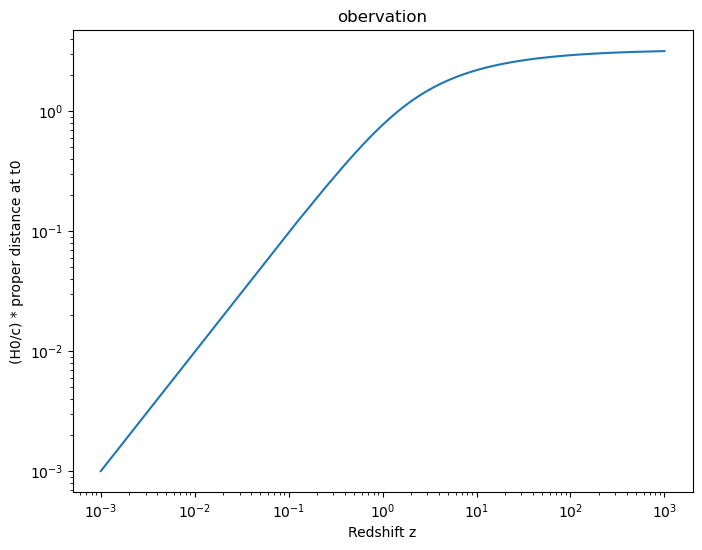

In [11]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


H0 = 67.7            #km/s/Mpc, Hubble constant
Om_r = 8.4e-5        # Radiation density parameter
Om_m = 0.3           # Matter density parameter
Om_L = 0.7           # Dark energy density parameter
Om_k = 1 - Om_r - Om_m - Om_L
G = 6.6743e-11       # Gravitational constant
c = 299792458        # Speed of light

def Hubble_parameter(z):
    return H0*np.sqrt(Om_r*(1+z)**4 + Om_m*(1+z)**3 + Om_k*(1+z)**2 + Om_L)

# Define the function for proper distance at t0
def proper_distance(z):
    integrand = lambda zp: 1/Hubble_parameter(zp)
    integral, _ = quad(integrand, 0, z)
    return integral*c  # convert from Mpc to km

# Define an array of redshift values to use for the plot
z_array = np.linspace(10**-3, 1000, 8000)

# Calculate (H0/c)*dp(t0) for each redshift value
hd_array = np.zeros_like(z_array)
for i, z in enumerate(z_array):
    hd_array[i] = (H0/c) * proper_distance(z)

# Plot the results
ax, fig = plt.subplots(figsize = (8,6))
plt.loglog(z_array, hd_array)
plt.xlabel('Redshift z')
plt.ylabel('(H0/c) * proper distance at t0')
plt.title('obervation')
plt.savefig('fig2.png')
plt.show()


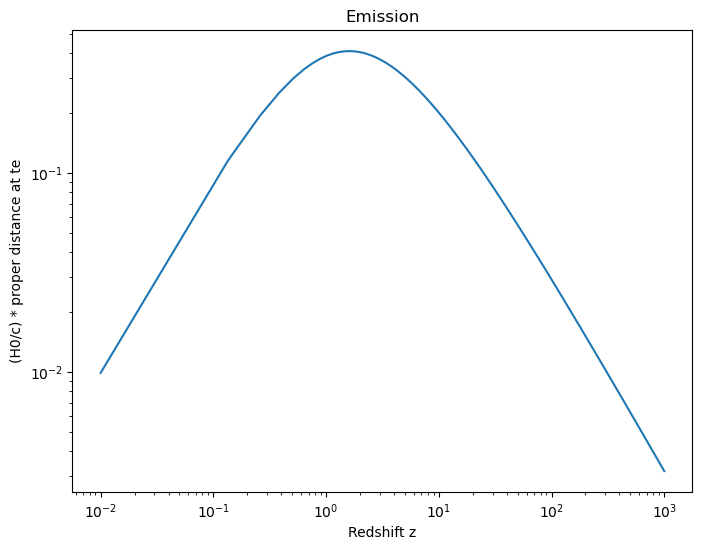

In [12]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

H0 = 67.7            #km/s/Mpc, Hubble constant
Om_r = 8.4e-5        # Radiation density parameter
Om_m = 0.3           # Matter density parameter
Om_L = 0.7           # Dark energy density parameter
Om_k = 1 - Om_r - Om_m - Om_L
G = 6.6743e-11       # Gravitational constant
c = 299792.458        # Speed of light

def Hubble_parameter(z):
    return H0*np.sqrt(Om_r*(1+z)**4 + Om_m*(1+z)**3 + Om_k*(1+z)**2 + Om_L)

# Define the function for proper distance at t0
def proper_distance(z):
    integrand = lambda zp: 1/Hubble_parameter(zp)
    integral, _ = quad(integrand, 0, z)
    return integral*c

# Define the function for proper distance at te
def proper_distance_em(z):
    a = 1 / (1 + z)
    return a * proper_distance(z)

# Define an array of redshift values to use for the plot
z_array = np.linspace(10**-2, 1000, 8000)

# Calculate (H0/c)*dp(te) for each redshift value
hd_array = np.zeros_like(z_array)
for i, z in enumerate(z_array):
    hd_array[i] = (H0/c) * proper_distance_em(z)

# Plot the results
ax, fig = plt.subplots(figsize = (8,6))
plt.loglog(z_array, hd_array)
plt.xlabel('Redshift z')
plt.ylabel('(H0/c) * proper distance at te')
plt.title('Emission')
plt.savefig("fig3.png")
plt.show()


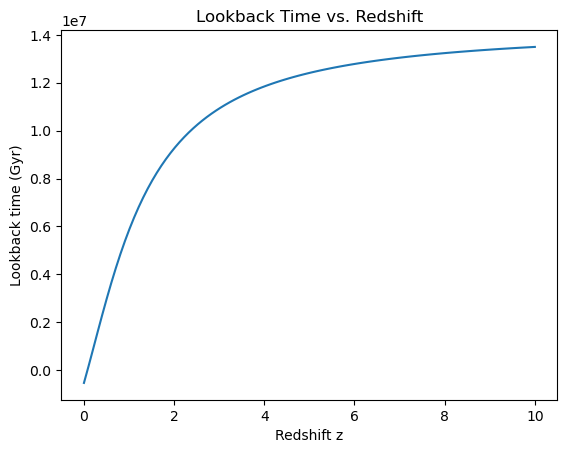

In [13]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


H0 = 67.7            #km/s/Mpc, Hubble constant
Om_r = 8.4e-5        # Radiation density parameter
Om_m = 0.3           # Matter density parameter
Om_L = 0.7           # Dark energy density parameter
Om_k = 1 - Om_r - Om_m - Om_L
G = 6.6743e-11       # Gravitational constant
c = 299792458        # Speed of light


def Hubble_parameter(z):
    return H0*np.sqrt(Om_r*(1+z)**4 + Om_m*(1+z)**3 + Om_k*(1+z)**2 + Om_L)


# Define the function for lookback time
def lookback_time(z):
    integrand = lambda zp: 1/((1+zp) * Hubble_parameter(zp))
    integral, _ = quad(integrand, 0, 1000)
    return integral - 1/Hubble_parameter(z)


# Define an array of redshift values to use for the plot
z_array = np.linspace(0, 10, 100)

# Calculate the lookback time for each redshift value
t_array = np.zeros_like(z_array)
for i, z in enumerate(z_array):
    t_array[i] = lookback_time(z)
# Convert lookback time to Gyr
t_array = t_array * 1e9
# Plot the results
plt.plot(z_array, t_array)
plt.xlabel('Redshift z')
plt.ylabel('Lookback time (Gyr)')
plt.title('Lookback Time vs. Redshift')
plt.show()


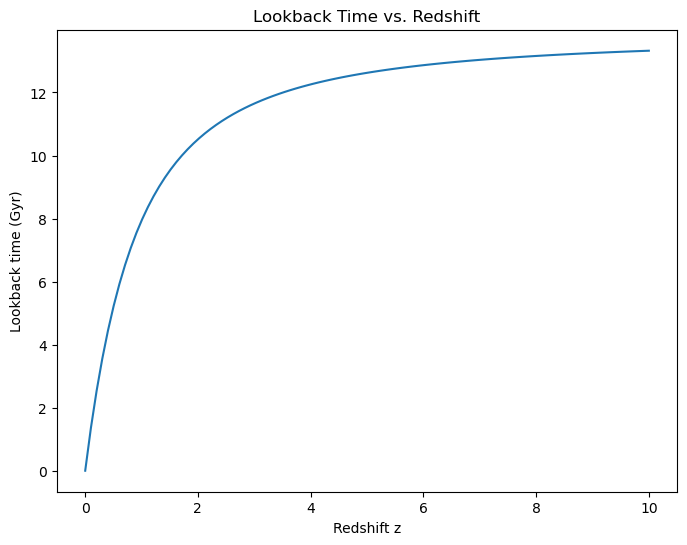

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo

# Define an array of redshift values to use for the plot
z_array = np.linspace(0, 10, 100)

# Calculate the lookback time for each redshift value using astropy
t_array = cosmo.lookback_time(z_array)

# Convert lookback time to Gyr
t_array = t_array.to('Gyr').value

# Plot the results
ax, fig = plt.subplots(figsize = (8,6))
plt.plot(z_array, t_array)
plt.xlabel('Redshift z')
plt.ylabel('Lookback time (Gyr)')
plt.title('Lookback Time vs. Redshift')
plt.savefig("fig4.png")
plt.show()
